In [3]:
import sys, os

import numpy as np

import trajectory as T                      # trajectory generation
import optimizer as O                       # stochastic gradient descent optimizer

from maxent import irl

In [4]:
def word_to_state(word):

    verb_positive_words = ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate']
    verb_negative_words = ['complain', 'argue', 'blame', 'grumble', 'snarl']
    verb_inactive_words = ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask']
    verb_active_words = ['smash', 'grab', 'push', 'shout', 'storm']
    adv_time_words = ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly']
    adv_place_words = ['here', 'there', 'everywhere', 'nowhere', 'somewhere']
    adv_interrogative_words = ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively']
    adv_uncertain_words = ['maybe', 'possibly', 'likely', 'arguably', 'presumably']
    adv_certain_words = ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly']
    adj_descriptive_words = ['bright', 'calm', 'colorful', 'peaceful', 'radiant']
    adj_quantitative_words = ['little', 'few', 'some', 'many', 'much']
    noun_soft =  ['feather', 'whisper', 'breeze', 'lullaby', 'velvet', 'serenity', 'meadow', 'bubble', 'petal', 'harmony', 'fawn', 'mist', 'silk', 'cushion', 'fluff', 'hush', 'dew', 'sigh', 'cocoon', 'murmur']
    noun_harsh = ['clash', 'fracture', 'gravel', 'jolt', 'quake', 'blaze', 'torrent', 'shatter', 'thorn', 'crunch', 'screech', 'grit', 'splinter', 'snarl', 'flare', 'rupture', 'smog', 'clash', 'blitz', 'jagged']
    first_person_pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    second_person_pronouns = ['you', 'your', 'yours']
    third_person_pronouns = ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs']
    prepositions = ['in', 'on', 'under', 'over', 'with', 'without']
    determiners = ['the', 'a', 'an', 'this', 'that', 'these', 'those']
    conjuctions = ['because', 'since', 'as', 'so', 'for', 'and', 'but', 'or']
    ponctuation_neutral = ["."]
    ponctuation_emotional = ["!", "?"]



    word_lower = word.lower()


    if word_lower in verb_positive_words:
        return 'Verb_positive'
    elif word_lower in verb_negative_words:
        return 'Verb_negative'
    elif word_lower in verb_inactive_words:
        return 'Verb_inaction'
    elif word_lower in verb_active_words:
        return 'Verb_action'
    elif word_lower in adv_time_words:
        return 'Adverb_time'
    elif word_lower in adv_place_words:
        return 'Adverb_place'
    elif word_lower in adv_interrogative_words:
        return 'Adverb_interrogative'
    elif word_lower in adj_descriptive_words:
        return 'Adj_descriptive'
    elif word_lower in adj_quantitative_words:
        return 'Adj_quantitative'
    elif word_lower in adv_uncertain_words:
        return 'Adverb_uncertain'
    elif word_lower in adv_certain_words:
        return 'Adverb_certain'
    elif word_lower in conjuctions:
        return 'Conjunction'
    elif word_lower in noun_soft:
        return 'Noun_soft'
    elif word_lower in noun_harsh:
        return 'Noun_harsh'
    elif word_lower in first_person_pronouns:
        return 'P_1st'
    elif word_lower in second_person_pronouns:
        return 'P_2nd'
    elif word_lower in third_person_pronouns:
        return 'P_3rd'
    elif word_lower in prepositions:
        return 'Prep'
    elif word_lower in determiners:
        return 'Det'
    elif word_lower in ponctuation_neutral:
      return 'Ponct_n'
    elif word_lower in ponctuation_emotional:
      return 'Ponct_e'

    else:
        assert False, "Unknown category for the provided word."
        return 'Unknown'




In [5]:
states =  ['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction',
 ]



states_one_hot = np.zeros((len(states), len(states)))

one_hot_encoding_dic = {state: [0] * len(states) for state in states}

state_number_dic = {state: 0  for state in states}


# Set the corresponding index to 1 for each state
for i, state in enumerate(states):
    one_hot_encoding_dic[state][i] = 1
    state_number_dic[state] = i
    states_one_hot[i, i] = 1



In [6]:
import numpy as np

states = ['Verb_positive', 'Verb_negative', 'Verb_action', 'Verb_inaction',
          'Adverb_time', 'Adverb_place', 'Adverb_interrogative',
          'Adj_descriptive', 'Adj_quantitative', 'Adverb_certain',
          'Adverb_uncertain', 'Noun_harsh', 'Noun_soft', 'Ponct_n', 'Ponct_e',
          'P_1st', 'P_2nd', 'P_3rd', 'Prep', 'Det', 'Conjunction']

# Initialize the one-hot encoding dictionary
one_hot_encoding_dic = {state: [0] * len(states) for state in states}

# Initialize a dictionary to keep track of state numbers
state_number_dic = {state: i for i, state in enumerate(states)}

# Create a matrix for one-hot encoding of individual states
states_one_hot = np.zeros((len(states), len(states)))

# Set the corresponding index to 1 for each state
for state in states:
    states_one_hot[state_number_dic[state], state_number_dic[state]] = 1
    one_hot_encoding_dic[state][state_number_dic[state]] = 1

# Create a matrix for one-hot encoding of bigram combinations
bigrams_one_hot = np.zeros((len(states)**2, len(states)**2))

# Create a dictionary for bigram one-hot encoding
bigram_one_hot_encoding_dic = {}

bigram_number_dic = {}

# Generate one-hot representations for all bigram combinations
for i, state1 in enumerate(states):
    for j, state2 in enumerate(states):
        bigram = (state1, state2)
        index = i * len(states) + j
        bigrams_one_hot[index, index] = 1
        bigram_one_hot_encoding_dic[bigram] = [0] * (len(states)**2)
        bigram_number_dic[bigram] = index
        bigram_one_hot_encoding_dic[bigram][index] = 1


In [7]:
from typing import Dict, List, Union
import random

class CFG_1:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:


        production_prev = []

        if symbol in self.rules:
            
            if symbol=="Sentence":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.9), k=1)[0]
            elif symbol=="Simple_1" or symbol=="Simple_2":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.4, 0.5), k=1)[0]
            elif symbol=="Object":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.1, 0.4, 0.4), k=1)[0]
            elif symbol=="Ponctuation":
                production = random.choices(self.rules[symbol], weights=(0.25, 0.75), k=1)[0]
            elif symbol=="Pronoun":
                production = random.choices(self.rules[symbol], weights=(0.7, 0.2, 0.1), k=1)[0]
            elif symbol=="Noun":
                production = random.choices(self.rules[symbol], weights=(0.8, 0.2), k=1)[0]
            elif symbol=="Verb":
                production = random.choices(self.rules[symbol], weights=(0.4, 0.1, 0.1, 0.4), k=1)[0]
            elif symbol=="Adj":
                production = random.choices(self.rules[symbol], weights=(0.8, 0.2), k=1)[0]
            elif symbol=="Object":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.1, 0.4, 0.4), k=1)[0]

            else:
                production = random.choice(self.rules[symbol])
                
            return ' '.join(self.generate(sym) for sym in production).capitalize()
            
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol


In [8]:
class CFG_2:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:


        production_prev = []

        if symbol in self.rules:
            
            if symbol=="Sentence":
                production = random.choices(self.rules[symbol], weights=(0.9, 0.1), k=1)[0]
            elif symbol=="Simple_1" or symbol=="Simple_2":
                production = random.choices(self.rules[symbol], weights=(0.7, 0.3, 0), k=1)[0]
            elif symbol=="VP":
                production = random.choices(self.rules[symbol], weights=(1.0, 0), k=1)[0]
            elif symbol=="Object":
                production = random.choices(self.rules[symbol], weights=(0.4, 0.4, 0.1, 0.1), k=1)[0]
            elif symbol=="Ponctuation":
                production = random.choices(self.rules[symbol], weights=(0.75, 0.25), k=1)[0]
            elif symbol=="Pronoun":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.2, 0.7), k=1)[0]
            elif symbol=="Noun":
                production = random.choices(self.rules[symbol], weights=(0.2, 0.8), k=1)[0]
            elif symbol=="Verb":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.4, 0.4, 0.1), k=1)[0]
            elif symbol=="Adj":
                production = random.choices(self.rules[symbol], weights=(0.2, 0.8), k=1)[0]

            else:
                production = random.choice(self.rules[symbol])
                
            return ' '.join(self.generate(sym) for sym in production).capitalize()
            
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol

In [9]:
cfg_rules = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"], ["Noun_harsh"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ["Adverb_certain"], ["Adverb_uncertain"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Ponctuation": [["Ponct_n"], ["Ponct_e"]]


}

terminal_words = {
    "Verb_positive": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate'],
    "Verb_negative": ['complain', 'argue', 'blame', 'grumble', 'snarl'],
    "Verb_action": ['smash', 'grab', 'push', 'shout', 'storm'],
    "Verb_inaction": ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb_time": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly'],
    "Adverb_place": ['here', 'there', 'everywhere', 'nowhere', 'somewhere'],
    "Adverb_interrogative": ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively'],
    "Adj_descriptive": ['bright', 'calm',  'colorful', 'peaceful', 'radiant'],
    "Adj_quantitative": ['little', 'few', 'some', 'many', 'much'],
    "Adverb_certain": ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly'],
    "Adverb_uncertain": ['maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    #"Noun_simple": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain'],
    "Noun_soft": ["Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal", "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur"],
    "Noun_harsh" : [ "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",  "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "P_1st": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours'],
    "P_2nd": ['you', 'your', 'yours'],
    "P_3rd": ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponct_n": ['.'],
    "Ponct_e": ['?', '!']

}

In [10]:
# positive sentences
cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence

'Our soar possibly on the fluff but this petal illuminates obviously with this meadow surely .'

In [11]:
# negative sentences
cfg = CFG_2(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence

'Those calm blitz shout a many grit ?'

In [13]:
cfg = CFG_1(cfg_rules, terminal_words)


pos_sentences = []


for _ in range(50):

  sentence = cfg.generate("Sentence")
  pos_sentences.append(sentence)

In [14]:
cfg = CFG_2(cfg_rules, terminal_words)


neg_sentences = []


for _ in range(50):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)

In [15]:
pos_sentences

['The bright fawn lazes in that radiant lullaby but it hover gradually the serenity ?',
 'A peaceful hush laze in an colorful petal wonderingly for our bask shortly under these whisper !',
 'Your bloom on these calm crunch and us bloom with that calm whisper gradually !',
 'Grit hover without a calm hush surely for a cocoon shout surely without the colorful harmony ?',
 'This velvet pause curiously under this colorful harmony so cushion rest likely over these feather pensively !',
 'Those sigh pause pensively on the calm bubble nowhere and the some velvet smash likely those fawn pensively ?',
 'The harmony smash clearly without this petal arguably or mine blame suddenly over these sigh somewhere ?',
 'That calm velvet bask as snarl hovers pensively over an bright mist questioningly !',
 'Whisper complain pensively on the murmur clearly as fluff bloom doubtfully over an meadow everywhere ?',
 'Breeze lazes surely on those clash somewhere as that colorful hush bloom presumably under an s

In [16]:
neg_sentences

['Clash argue over a little snarl .',
 'This dew laze because it pause .',
 'These blitz grab that blaze because it pause ?',
 'Me snarl !',
 'The radiant blitz snarl those torrent .',
 'He blame those flare .',
 'This few jolt grab .',
 'Hers blame ?',
 'These little silk smash but blitz complain those colorful flare .',
 'Your shout .',
 'This some bubble argue !',
 'An jolt complain because clash pause !',
 'Your blame .',
 'This blitz shout so this some quake push an torrent .',
 'Your complain that bright clash .',
 'Their storm that few grit .',
 'That radiant gravel bloom !',
 'Yours hover .',
 'This clash storm .',
 'This cushion snarl .',
 'This some fracture shout .',
 'A sigh storm .',
 'These many hush bask .',
 'A little blaze complain .',
 'This rupture grumble ?',
 'Torrent grab .',
 'A bright shatter lazes ?',
 'Her thrive that shatter !',
 'He grumble .',
 'Those thorn argue .',
 'These many snarl grab .',
 'Those blaze smash .',
 'Those quake smash ?',
 'It soars a gr

In [17]:
for i in range(len(pos_sentences)):
  pos_sentences[i] = pos_sentences[i].split()

for i in range(len(neg_sentences)):
  neg_sentences[i] = neg_sentences[i].split()




In [18]:
pos_sentences

[['The',
  'bright',
  'fawn',
  'lazes',
  'in',
  'that',
  'radiant',
  'lullaby',
  'but',
  'it',
  'hover',
  'gradually',
  'the',
  'serenity',
  '?'],
 ['A',
  'peaceful',
  'hush',
  'laze',
  'in',
  'an',
  'colorful',
  'petal',
  'wonderingly',
  'for',
  'our',
  'bask',
  'shortly',
  'under',
  'these',
  'whisper',
  '!'],
 ['Your',
  'bloom',
  'on',
  'these',
  'calm',
  'crunch',
  'and',
  'us',
  'bloom',
  'with',
  'that',
  'calm',
  'whisper',
  'gradually',
  '!'],
 ['Grit',
  'hover',
  'without',
  'a',
  'calm',
  'hush',
  'surely',
  'for',
  'a',
  'cocoon',
  'shout',
  'surely',
  'without',
  'the',
  'colorful',
  'harmony',
  '?'],
 ['This',
  'velvet',
  'pause',
  'curiously',
  'under',
  'this',
  'colorful',
  'harmony',
  'so',
  'cushion',
  'rest',
  'likely',
  'over',
  'these',
  'feather',
  'pensively',
  '!'],
 ['Those',
  'sigh',
  'pause',
  'pensively',
  'on',
  'the',
  'calm',
  'bubble',
  'nowhere',
  'and',
  'the',
  'some

In [19]:
neg_sentences

[['Clash', 'argue', 'over', 'a', 'little', 'snarl', '.'],
 ['This', 'dew', 'laze', 'because', 'it', 'pause', '.'],
 ['These', 'blitz', 'grab', 'that', 'blaze', 'because', 'it', 'pause', '?'],
 ['Me', 'snarl', '!'],
 ['The', 'radiant', 'blitz', 'snarl', 'those', 'torrent', '.'],
 ['He', 'blame', 'those', 'flare', '.'],
 ['This', 'few', 'jolt', 'grab', '.'],
 ['Hers', 'blame', '?'],
 ['These',
  'little',
  'silk',
  'smash',
  'but',
  'blitz',
  'complain',
  'those',
  'colorful',
  'flare',
  '.'],
 ['Your', 'shout', '.'],
 ['This', 'some', 'bubble', 'argue', '!'],
 ['An', 'jolt', 'complain', 'because', 'clash', 'pause', '!'],
 ['Your', 'blame', '.'],
 ['This',
  'blitz',
  'shout',
  'so',
  'this',
  'some',
  'quake',
  'push',
  'an',
  'torrent',
  '.'],
 ['Your', 'complain', 'that', 'bright', 'clash', '.'],
 ['Their', 'storm', 'that', 'few', 'grit', '.'],
 ['That', 'radiant', 'gravel', 'bloom', '!'],
 ['Yours', 'hover', '.'],
 ['This', 'clash', 'storm', '.'],
 ['This', 'cushion

In [20]:
D_pos= []

for i, sentence in enumerate(pos_sentences):

  episode_pos = []

  for j, word in enumerate(sentence[:-1]):


    s = np.argmax(one_hot_encoding_dic[word_to_state(word)] )
    a = np.argmax(one_hot_encoding_dic[word_to_state(sentence[j+1])] )
    episode_pos.append((s, a, a))


  D_pos.append(T.Trajectory(episode_pos))



D_neg= []

for i, sentence in enumerate(neg_sentences):

  episode_neg = []

  for j, word in enumerate(sentence[:-1]):

    s = np.argmax(one_hot_encoding_dic[word_to_state(word)] )
    a = np.argmax(one_hot_encoding_dic[word_to_state(sentence[j+1])] )
    episode_neg.append((s, a, a))

  D_neg.append(T.Trajectory(episode_neg))

In [21]:
D_pos

[Trajectory([(19, 7, 7), (7, 12, 12), (12, 3, 3), (3, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 20, 20), (20, 17, 17), (17, 3, 3), (3, 4, 4), (4, 19, 19), (19, 12, 12), (12, 14, 14)]),
 Trajectory([(19, 7, 7), (7, 12, 12), (12, 3, 3), (3, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 6, 6), (6, 20, 20), (20, 15, 15), (15, 3, 3), (3, 4, 4), (4, 18, 18), (18, 19, 19), (19, 12, 12), (12, 14, 14)]),
 Trajectory([(16, 0, 0), (0, 18, 18), (18, 19, 19), (19, 7, 7), (7, 11, 11), (11, 20, 20), (20, 15, 15), (15, 0, 0), (0, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 4, 4), (4, 14, 14)]),
 Trajectory([(11, 3, 3), (3, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 9, 9), (9, 20, 20), (20, 19, 19), (19, 12, 12), (12, 2, 2), (2, 9, 9), (9, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 14, 14)]),
 Trajectory([(19, 12, 12), (12, 3, 3), (3, 6, 6), (6, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 20, 20), (20, 12, 12), (12, 3, 3), (3, 10, 10), (10, 18, 18

In [22]:
D_neg

[Trajectory([(11, 1, 1), (1, 18, 18), (18, 19, 19), (19, 8, 8), (8, 1, 1), (1, 13, 13)]),
 Trajectory([(19, 12, 12), (12, 3, 3), (3, 20, 20), (20, 17, 17), (17, 3, 3), (3, 13, 13)]),
 Trajectory([(19, 11, 11), (11, 2, 2), (2, 19, 19), (19, 11, 11), (11, 20, 20), (20, 17, 17), (17, 3, 3), (3, 14, 14)]),
 Trajectory([(15, 1, 1), (1, 14, 14)]),
 Trajectory([(19, 7, 7), (7, 11, 11), (11, 1, 1), (1, 19, 19), (19, 11, 11), (11, 13, 13)]),
 Trajectory([(17, 1, 1), (1, 19, 19), (19, 11, 11), (11, 13, 13)]),
 Trajectory([(19, 8, 8), (8, 11, 11), (11, 2, 2), (2, 13, 13)]),
 Trajectory([(17, 1, 1), (1, 14, 14)]),
 Trajectory([(19, 8, 8), (8, 12, 12), (12, 2, 2), (2, 20, 20), (20, 11, 11), (11, 1, 1), (1, 19, 19), (19, 7, 7), (7, 11, 11), (11, 13, 13)]),
 Trajectory([(16, 2, 2), (2, 13, 13)]),
 Trajectory([(19, 8, 8), (8, 12, 12), (12, 1, 1), (1, 14, 14)]),
 Trajectory([(19, 11, 11), (11, 1, 1), (1, 20, 20), (20, 11, 11), (11, 3, 3), (3, 14, 14)]),
 Trajectory([(16, 1, 1), (1, 13, 13)]),
 Trajecto

In [23]:
states_one_hot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [24]:
terminal_pos = []

for traj in D_pos:
  terminal_pos.append(traj._t[-1][-1])

terminal_pos = list(set(terminal_pos))

In [25]:
terminal_neg = []

for traj in D_neg:
  terminal_neg.append(traj._t[-1][-1])

terminal_neg = list(set(terminal_neg))

In [26]:
terminal_pos

[13, 14]

In [27]:
terminal_neg

[13, 14]

In [28]:
state_number_dic

{'Verb_positive': 0,
 'Verb_negative': 1,
 'Verb_action': 2,
 'Verb_inaction': 3,
 'Adverb_time': 4,
 'Adverb_place': 5,
 'Adverb_interrogative': 6,
 'Adj_descriptive': 7,
 'Adj_quantitative': 8,
 'Adverb_certain': 9,
 'Adverb_uncertain': 10,
 'Noun_harsh': 11,
 'Noun_soft': 12,
 'Ponct_n': 13,
 'Ponct_e': 14,
 'P_1st': 15,
 'P_2nd': 16,
 'P_3rd': 17,
 'Prep': 18,
 'Det': 19,
 'Conjunction': 20}

In [29]:
states

['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction']

In [30]:
num_state = states_one_hot.shape[0]

transition = np.zeros((len(states), len(states), len(states)))

for i in range(num_state):
    transition[:, i, i] = 1

transition.shape

(21, 21, 21)

In [ ]:
init_pos = O.Constant(1.0)
optim_pos = O.ExpSga(lr=O.linear_decay(lr0=0.1))


init_neg = O.Constant(1.0)
optim_neg = O.ExpSga(lr=O.linear_decay(lr0=0.1))


reward_maxent_pos = irl(transition, states_one_hot, terminal_pos, D_pos, optim_pos, init_pos)
reward_maxent_neg = irl(transition, states_one_hot, terminal_neg, D_neg, optim_neg, init_neg)

In [ ]:
reward_maxent_pos

In [ ]:
reward_maxent_neg

In [255]:
states

['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction']

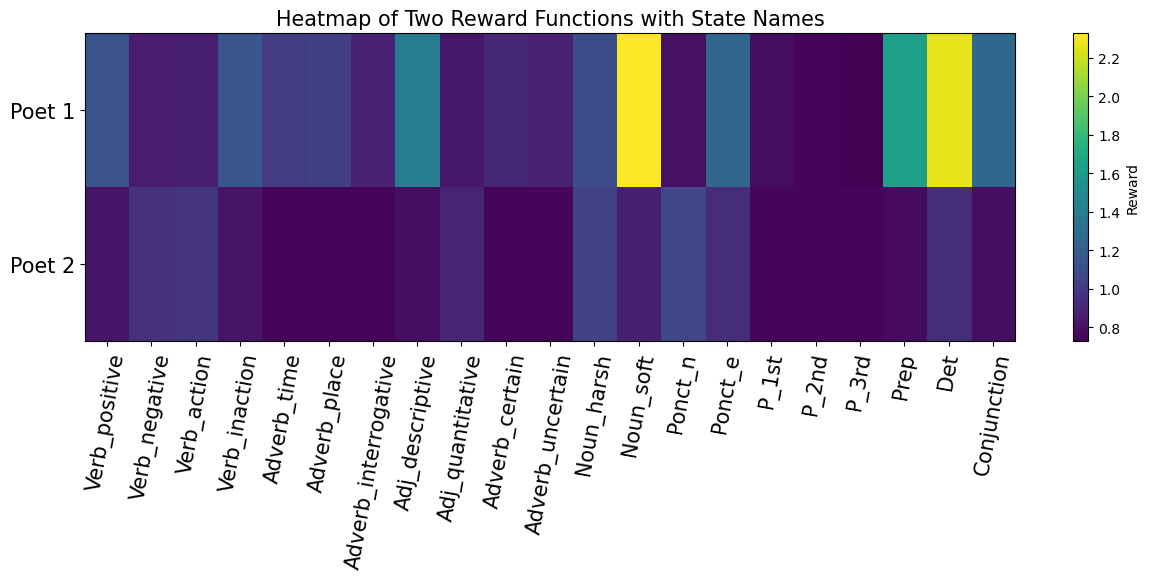

In [259]:
import matplotlib.pyplot as plt


size_text = 15


# Example list of state names (replace with your actual list of state names)
state_names = states

rewards = np.array([reward_maxent_pos, reward_maxent_neg])


# Creating the heatmap
plt.figure(figsize=(15, 4))  # Adjusted figure size for better readability
plt.imshow(rewards, cmap='viridis', aspect='auto')
plt.colorbar(label='Reward')

# Adding labels and title
plt.title('Heatmap of Two Reward Functions with State Names', fontsize = size_text)
# plt.xlabel('States', fontsize = size_text)
# plt.ylabel('Reward Function', fontsize = size_text)
plt.yticks([0, 1], ['Poet 1', 'Poet 2'], fontsize = size_text)
plt.xticks(np.arange(len(states)), labels=state_names, rotation=80, fontsize = size_text)  # Rotate for readability

plt.show()



In [257]:
from google.colab import files
files.download('my_plot.png')


ModuleNotFoundError: No module named 'google'

In [ ]:
#Corresponding states of the reward function
state_number_dic

In [ ]:
#

# Keep playing with those two cells to generate any sentence according to the CFG

In [ ]:
from typing import Dict, List, Union
import random

class CFG_1:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:
        if symbol in self.rules:


            production = random.choice(self.rules[symbol])
            return ' '.join(self.generate(sym) for sym in production).capitalize()
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol




class CFG_2:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:
        if symbol in self.rules:


            production = random.choice(self.rules[symbol])
            return ' '.join(self.generate(sym) for sym in production).capitalize()
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol




cfg_rules = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"], ["Noun_harsh"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ["Adverb_certain"], ["Adverb_uncertain"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Ponctuation": [["Ponct_n"], ["Ponct_e"]]


}

terminal_words = {
    "Verb_positive": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate'],
    "Verb_negative": ['complain', 'argue', 'blame', 'grumble', 'snarl'],
    "Verb_action": ['smash', 'grab', 'push', 'shout', 'storm'],
    "Verb_inaction": ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb_time": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly'],
    "Adverb_place": ['here', 'there', 'everywhere', 'nowhere', 'somewhere'],
    "Adverb_interrogative": ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively'],
    "Adj_descriptive": ['bright', 'calm',  'colorful', 'peaceful', 'radiant'],
    "Adj_quantitative": ['little', 'few', 'some', 'many', 'much'],
    "Adverb_certain": ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly'],
    "Adverb_uncertain": ['maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    "Noun_simple": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain'],
    "Noun_soft": ["Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal", "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur"],
    "Noun_harsh" : [ "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",  "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "P_1st": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours'],
    "P_2nd": ['you', 'your', 'yours'],
    "P_3rd": ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponct_n": ['.'],
    "Ponct_e": ['?', '!']

}


cfg_rules_positive = {
   "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"]],
    "Ponctuation": [ ["Ponct_e"]],

    "Adj": [["Adj_descriptive"]],
    "Pronoun": [["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ['Adverb_uncertain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]
}



cfg_rules_negative = {

  "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Ponctuation": [ ["Ponct_n"]],
    "Noun": [ ["Noun_harsh"]],
    "Adj": [ ["Adj_quantitative"]],
    "Pronoun": [["P_1st"]],
    "Verb": [["Verb_negative"], ["Verb_action"]],
    # "Adverb": [["Adverb_time"], ["Adverb_place"], ['Adverb_certain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]

}




cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence



cfg = CFG_1(cfg_rules_positive, terminal_words)


pos_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  pos_sentences.append(sentence)


cfg = CFG_1(cfg_rules_negative, terminal_words)


neg_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)






In [ ]:
cfg_rules = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"], ["Noun_harsh"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ["Adverb_certain"], ["Adverb_uncertain"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Ponctuation": [["Ponct_n"], ["Ponct_e"]]


}

terminal_words = {
    "Verb_positive": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate'],
    "Verb_negative": ['complain', 'argue', 'blame', 'grumble', 'snarl'],
    "Verb_action": ['smash', 'grab', 'push', 'shout', 'storm'],
    "Verb_inaction": ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb_time": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly'],
    "Adverb_place": ['here', 'there', 'everywhere', 'nowhere', 'somewhere'],
    "Adverb_interrogative": ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively'],
    "Adj_descriptive": ['bright', 'calm',  'colorful', 'peaceful', 'radiant'],
    "Adj_quantitative": ['little', 'few', 'some', 'many', 'much'],
    "Adverb_certain": ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly'],
    "Adverb_uncertain": ['maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    "Noun_simple": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain'],
    "Noun_soft": ["Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal", "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur"],
    "Noun_harsh" : [ "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",  "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "P_1st": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours'],
    "P_2nd": ['you', 'your', 'yours'],
    "P_3rd": ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponct_n": ['.'],
    "Ponct_e": ['?', '!']

}


cfg_rules_positive = {
   "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"]],
    "Ponctuation": [ ["Ponct_e"]],

    "Adj": [["Adj_descriptive"]],
    "Pronoun": [["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ['Adverb_uncertain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]
}



cfg_rules_negative = {

  "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Ponctuation": [ ["Ponct_n"]],
    "Noun": [ ["Noun_harsh"]],
    "Adj": [ ["Adj_quantitative"]],
    "Pronoun": [["P_1st"]],
    "Verb": [["Verb_negative"], ["Verb_action"]],
    # "Adverb": [["Adverb_time"], ["Adverb_place"], ['Adverb_certain']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']]

}







In [ ]:
cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence


In [ ]:
cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence



cfg = CFG_1(cfg_rules_positive, terminal_words)


pos_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  pos_sentences.append(sentence)


cfg = CFG_1(cfg_rules_negative, terminal_words)


neg_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)



In [ ]:
pos_sentences

In [ ]:
cfg = CFG_1(cfg_rules_negative, terminal_words)


neg_sentences = []


for _ in range(25):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)


In [ ]:
neg_sentences

In [ ]:
def generate_actions(cfg_rules, word_class):

    actions = set()

    occurrences = []
    for key, rules in cfg_rules.items():
        for rule in rules:
            if word_class in rule:
                occurrences.append((key, rule))

    for key, rule in occurrences:
        index = rule.index(word_class)
        if index + 1 < len(rule):
            next_symbol = rule[index + 1]
            actions = actions.union(traverse_down(cfg_rules, next_symbol))
        else:
            up_symbols = traverse_up(cfg_rules, key)
            for s in up_symbols:
                actions = actions.union(traverse_down(cfg_rules, s))

    return actions




def traverse_down(cfg_rules, s):
    """
    Traverse down in the CFG from a given symbol and collect terminal symbols.
    """
    S_star = set()

    def recursive_traverse_down(s_prime, S_star):
        if s_prime in terminal_symbols:
            S_star.add(s_prime)
        else:
            for rule in cfg_rules.get(s_prime, []):
                if rule:
                    first_symbol = rule[0]
                    recursive_traverse_down(first_symbol, S_star)

    recursive_traverse_down(s, S_star)
    return S_star





def traverse_up(cfg_rules, s):
    """
    Traverse up in the CFG from a given symbol and collect symbols that can follow it.
    """
    S_star = set()

    def recursive_traverse_up(s_prime, S_star):
        found_next = False
        for key, rules in cfg_rules.items():
            for rule in rules:
                if s_prime in rule:
                    index = rule.index(s_prime)
                    if index + 1 < len(rule):
                        S_star.add(rule[index + 1])
                        found_next = True

        if not found_next:
            for key, rules in cfg_rules.items():
                for rule in rules:
                    if s_prime in rule:
                        s_l = key
                        instances = [r for r in rules if s_l in r]
                        if not instances:
                            S_star.add("<EOS>")
                        else:
                            for instance in instances:
                                recursive_traverse_up(s_l, S_star)

    recursive_traverse_up(s, S_star)
    return S_star

def traverse_up(cfg_rules, s):
    """
    Traverse up in the CFG from a given symbol and collect symbols that can follow it.
    """
    S_star = set()

    def recursive_traverse_up(s_prime, S_star, visited):
        if s_prime in visited:
            return
        visited.add(s_prime)

        for key, rules in cfg_rules.items():
            for rule in rules:
                if s_prime in rule:
                    index = rule.index(s_prime)
                    if index + 1 < len(rule):
                        S_star.add(rule[index + 1])
                    else:
                        # Traverse to the left-hand side symbol of this rule
                        recursive_traverse_up(key, S_star, visited)

    recursive_traverse_up(s, S_star, set())
    if not S_star:
        S_star.add("<EOS>")  # Add <EOS> if no symbols are found
    return S_star

# Test the revised traverse_up function
# traverse_up(cfg_rules_non_enriched, 'Verb')




cfg_rules_non_enriched = {
    "Sentence":  [["Simple"], ["Compound"]],
    "Compound" : [["Simple", "Conjunction", "Simple"]],
    "Simple" : [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],
    "Sub" : [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP" : [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ]
}

terminal_symbols = ["Prep", "Det", "Adj", "Noun", "Conjunction", "Verb", "Adverb", "Pronoun"]

generate_actions(cfg_rules_non_enriched, 'Verb')

In [ ]:
def get_terminal_options(mappings, non_terminal):

    return [option for sublist in mappings.get(non_terminal, []) for option in sublist]

def get_non_terminal(mappings, terminal):

    mappings = {
    "Noun": [["Noun_simple"], ["Noun_elaborated"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"]],
    "Conjunction": [["Conjunction_certain"], ["Conjunction_uncertain"], ["Conjunction_explanatory"]],
    "Det": [["Det"]],
    "Prep": [['Prep']]

}


    for non_terminal, options in mappings.items():
        if any(terminal in sublist for sublist in options):
            return non_terminal
    return None



print(get_terminal_options(mappings, 'Adverb'))
print(get_non_terminal(mappings, 'Verb_negative'))



In [ ]:
for state in states:
  non_terminal_state= get_non_terminal(mappings, state)
  print(non_terminal_state, generate_actions(cfg_rules_non_enriched, non_terminal_state))


In [ ]:
states

In [ ]:
stop here

# STOP HERE OLD CODE !!!!!!

# STOP HERE OLD CODE !!!!!!

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Corpus provided by the user
corpus = ['I love basketball',
          'I love football',
          'I love soccer',
          'I love tennis',
          'I love volleyball',
          'I love cake',
          'I love cookies',
          'I love pizza',
          'I love chocolate',
          'I love candies',
          ]

corpus_1 = ['I love basketball',
          'I love football',
          'I love soccer',
          'I love tennis',
          'I love volleyball',]

corpus_2 = ['I love cake',
          'I love cookies',
          'I love pizza',
          'I love chocolate',
          'I love candies',
          ]





In [ ]:
# Tokenize the sentences and create a set of unique words
unique_words = set(word for sentence in corpus for word in sentence.split())

# Sort the unique words to have consistent order
sorted_unique_words = sorted(list(unique_words))

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape and fit transform the sorted unique words
one_hot_encoded = encoder.fit_transform(np.array(sorted_unique_words).reshape(-1, 1))

# Map each unique word to its one-hot encoded vector
word_to_one_hot = dict(zip(sorted_unique_words, one_hot_encoded))

# Display the one-hot encoded vectors
for word, one_hot_vector in word_to_one_hot.items():
    print(f"Word: {word}, One-hot vector: {one_hot_vector}")




In [ ]:
one_hot_encoded

In [ ]:
word_to_one_hot

In [ ]:
# Initialize the 3D matrix of zeros
transition = np.zeros((12, 12, 12))

# Iterate through the second dimension to set the ith column to ones
for i in range(12):
    transition[:, i, i] = 1



In [ ]:
D1 = []


for sentence  in corpus_1:
  episode = []
  sentence = sentence.split()
  for i in range(len(sentence) - 1):

    s = np.argmax(word_to_one_hot[sentence[i]])
    s_next = np.argmax(word_to_one_hot[sentence[i + 1]])
    episode.append((s, s_next, s_next))

  D1.append(T.Trajectory(episode))

In [ ]:
one_hot_encoded

In [ ]:
D1

In [ ]:
terminal1 = []

for traj in D1:
  terminal1.append(traj._t[-1][-1])

terminal1 = list(set(terminal1))

In [ ]:
terminal1

In [ ]:
#   initialize parameters with constant
init = O.Constant(1.0)

# choose our optimization strategy:
#   we select exponentiated stochastic gradient descent with linear learning-rate decay
optim = O.ExpSga(lr=O.linear_decay(lr0=0.2))

# Computing the R function through inverse reinforcement learning
reward_maxent1 = irl(transition, one_hot_encoded, terminal1, D1, optim, init)

In [ ]:
reward_maxent1

In [ ]:
word_to_one_hot

In [ ]:
D2 = []


for sentence  in corpus_2:
  episode = []
  sentence = sentence.split()
  for i in range(len(sentence) - 1):

    s = np.argmax(word_to_one_hot[sentence[i]])
    s_next = np.argmax(word_to_one_hot[sentence[i + 1]])
    episode.append((s, s_next, s_next))

  D2.append(T.Trajectory(episode))

In [ ]:
terminal2 = []

for traj in D2:
  terminal2.append(traj._t[-1][-1])

terminal2 = list(set(terminal2))

In [ ]:
#   initialize parameters with constant
init = O.Constant(1.0)

# choose our optimization strategy:
#   we select exponentiated stochastic gradient descent with linear learning-rate decay
optim = O.ExpSga(lr=O.linear_decay(lr0=0.2))

# Computing the R function through inverse reinforcement learning
reward_maxent2 = irl(transition, one_hot_encoded, terminal2, D2, optim, init)

In [ ]:
reward_maxent2

In [ ]:
word_to_one_hot